<div class="frontmatter text-center">
<h2> MATH5027 Scientific Python, Fall 2017</h2>
<h2> Homework 3, Due: Tuesday October 17th, 3pm </h2>
</div>

Instructions: complete the selection of exercises from the week's class notebooks. Use markdown cells between code examples to explain.

## Questions 
### From Class 5:


1) Write a Python program (function!) to subtract five days from current date

2) Write a Python program (function!) to add 5 seconds with current time

3) Write a Python program (function!) to get a list of dates between two dates

4) Calculate the difference (function!) in days between the unix Epoch and your birthdate

In [1]:
def todayminusfive():
    import datetime
    output = datetime.datetime.now() - datetime.timedelta(days=5)
    return output.strftime("Five days ago it was %Y-%m-%d")
todayminusfive()

'Five days ago it was 2017-10-11'

In [2]:
def addfiveseconds():
    import datetime
    output = datetime.datetime.now() - datetime.timedelta(seconds=5)
    return output.strftime("In five seconds: date: %Y-%m-%d,time: %H-%M-%S")
addfiveseconds()

'In five seconds: date: 2017-10-16,time: 20-44-22'

In [1]:
import datetime
def listbetweendays(beginning, end):
    
    betweendays = []
    if beginning < end:
        timestep = datetime.timedelta(days=1)
        actual = beginning
        while actual < end:
            actual = actual + timestep
            betweendays.append((datetime.datetime.strftime(actual, "%Y-%m-%d")))
        return betweendays
    
    else:
        print ("The earlier day should have a smaller value than the later one.")
    

start = datetime.date(2017, 7, 15)
stop = datetime.date(2017, 8, 21)
listbetweendays(start, stop)

['2017-07-16',
 '2017-07-17',
 '2017-07-18',
 '2017-07-19',
 '2017-07-20',
 '2017-07-21',
 '2017-07-22',
 '2017-07-23',
 '2017-07-24',
 '2017-07-25',
 '2017-07-26',
 '2017-07-27',
 '2017-07-28',
 '2017-07-29',
 '2017-07-30',
 '2017-07-31',
 '2017-08-01',
 '2017-08-02',
 '2017-08-03',
 '2017-08-04',
 '2017-08-05',
 '2017-08-06',
 '2017-08-07',
 '2017-08-08',
 '2017-08-09',
 '2017-08-10',
 '2017-08-11',
 '2017-08-12',
 '2017-08-13',
 '2017-08-14',
 '2017-08-15',
 '2017-08-16',
 '2017-08-17',
 '2017-08-18',
 '2017-08-19',
 '2017-08-20',
 '2017-08-21']

In [36]:
import datetime
def epochandmybirthday(bday):
    birth = bday
    db = birth - datetime.datetime(1970, 1, 1)
    dbdays = db.days
    return "The difference between my birthday and the epoch is " + str(dbdays) + " days."

birthday = datetime.datetime(1971, 3, 31)
epochandmybirthday(birthday)

'The difference between my birthday and the epoch is 454 days.'

### From Class 6:

1) Create a for loop over all years and months between 2010 and 2011, in each loop download the json exchange data for each month, and save it to a big dictionary called ``time2data``, where keys are (year,month) tuples.
*Important*: It should take only a few seconds. If you are not sure your code works, test only with a few months, as you can reach the rate limit.

2) Register for the API, and create your own app_id key

3) Get the exchange rate HUF vs USD from 2000 to 2010, but every six months. Plot it on a plot.

4) Get the exchange rate EUR vs USD from 2000 to 2010 monthly (careful with API rate limits! Test with, say, one year of data, and then request the rest). Plot it.

5) Combine the two previous trends in one plot: put EUR vs USD in the main plot and HUF vs USD in an insert. Use different colors, and different symbols.



In [5]:
# 1 + 2 loop and import 

app_id = open("C:/FOLDERS/CEU/Scientific Python/exchange_api_id.txt").read().strip()

In [7]:
import urllib.request
import json
import datetime
time2data = {}
base_url = "http://openexchangerates.org/api"
id_str   = "app_id=%s" % app_id  

for h in range(2000,2011):
    for i in range(1,13):
        if i < 10:
            datum = "%s/historical/" + str(h) + "-" + str(0) + str(i) + "-15.json?%s"
        else:
            datum = "%s/historical/" + str(h) + "-" + str(i) + "-15.json?%s"
        URL = datum % (base_url, id_str)
        request = urllib.request.Request(URL)
        result = urllib.request.urlopen(request)
        text = result.read()
        text_to_dic = json.loads(text)
        timestamp = text_to_dic["timestamp"]
        key = (int(datetime.datetime.fromtimestamp(timestamp).strftime("%Y")),int(datetime.datetime.fromtimestamp(timestamp).strftime("%m")))
        time2data[key] = text_to_dic["rates"]

In [34]:
# 3 USDHUF, semiannual
list_ex_USDHUF = []
list_ts_USDHUF = []

for y_m in sorted(time2data.keys()): 
    if y_m[1]%6 == 0:                                
        list_ts_USDHUF.append(y_m)
        data = time2data[y_m]
        exch_huf = data["HUF"]
        list_ex_USDHUF.append(exch_huf)

In [1]:
import matplotlib.dates
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from pylab import *

In [44]:
list_dt_USDHUF = [datetime.datetime(year=yr,month=mo,day=15) for yr,mo in list_ts_USDHUF]
dates_USDHUF = matplotlib.dates.date2num(list_dt_USDHUF)

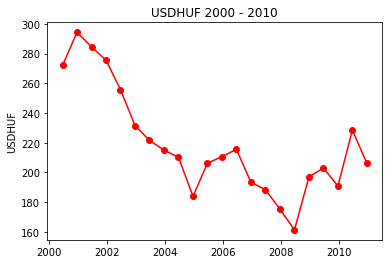

In [45]:
plt.plot_date(dates_USDHUF, list_ex_USDHUF, "ro-")
plt.ylabel("USDHUF")
plt.title("USDHUF 2000 - 2010", fontsize = 12)
plt.show()

In [78]:
# 4 EURUSD monthly
list_ex_EURUSD = []
list_ts_EURUSD = []

for y_m in sorted(time2data.keys()): # sorted() makes sure we loop
                                     # over the dict in time order
    list_ts_EURUSD.append(y_m)
    
    data = time2data[y_m]
    exch_eur = 1 / data["EUR"]      # EURUSD is quoted as USD per one unit of EUR
    list_ex_EURUSD.append(exch_eur)

In [46]:
list_dt_EURUSD = [datetime.datetime(year=yr,month=mo,day=15) for yr,mo in list_ts_EURUSD]
dates_EURUSD = matplotlib.dates.date2num(list_dt_EURUSD)

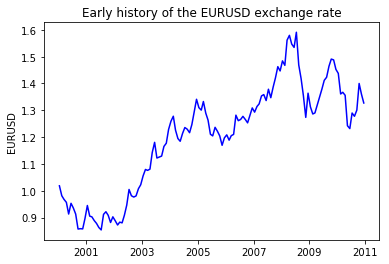

In [48]:
plt.plot_date(dates, list_ex_EURUSD, "b-")
plt.ylabel("EURUSD")
plt.title("Early history of the EURUSD exchange rate", fontsize = 12)
show()

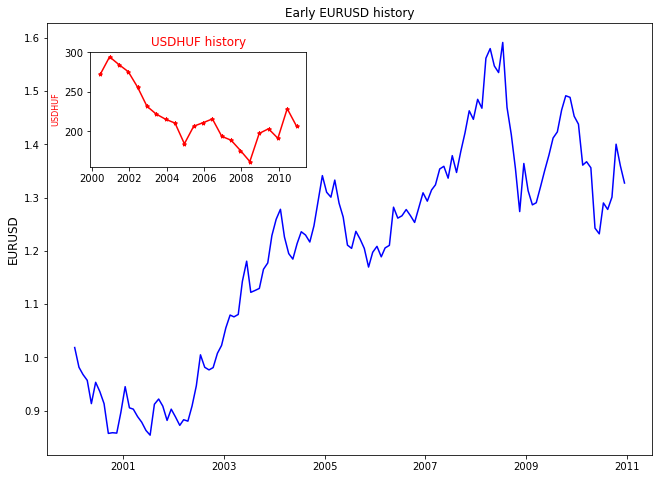

In [77]:
# 5 insert USDHUF into the EURUSD chart
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 1.4, 1.5])
axes2 = fig.add_axes([0.2, 1.1, 0.5, 0.4])

axes1.plot(dates_EURUSD, list_ex_EURUSD,"b")
axes1.set_ylabel("EURUSD", fontsize = 12)
axes1.xaxis_date()
axes1.set_title("Early EURUSD history")

axes2.plot(dates_USDHUF, list_ex_USDHUF, "r*-", markersize = 4)
axes2.set_ylabel("USDHUF", fontsize = 8, color = "r")
axes2.xaxis_date()
axes2.set_title("USDHUF history", color = "r")
plt.show()


### class 7
1) Generate data with $x \in [0,3]$ and $y=e^{-x+1}x^2+\text{gaussian noise*0.15}$. Plot it in a scatter plot.



2) Using the data contained in the file stockholm_data.dat:
* Calculate the average temperature of each trimester and plot it (*Hint*: use np.logical_and to calculate the `and` between two arrays). Can you do it with one line of code only? 
* Plot the yearly records (that is maximum and minimum temperature) recorded each year from 1800 to 2010.


3) By using the API exchange rate, get the rates each 3 months from 1999 to 2016. Create a csv file (you can look up the module ```csv``` or just write your own functions) with the rate for the currencies Euro, British Pound Sterling, Hungarian Forint, Japanese Yen, in this time span.
Use numpy to load this csv file and:
* plot in the same figure the yearly averages of these currencies over time.
* plot their moving average in a 5 year window.
* plot the maximum in each 2 years window for EUR and HUF.


In [1]:
# 0
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random

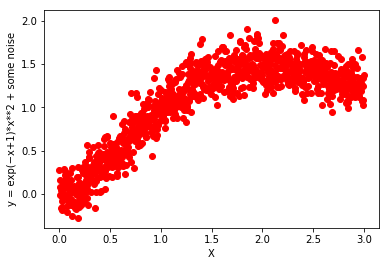

In [49]:
#1

X = np.linspace(0, 3, 1000)
Y = np.exp(-X+1)*X**2 + 0.15*(np.random.randn(*X.shape))
plt.plot(X, Y, "ro")
plt.xlabel("X")
plt.ylabel("y = exp(−x+1)*x**2 + some noise")
plt.show()


In [79]:
# 2 Stockholm weather data
stockholm_data = np.genfromtxt('stockholm_temperatures.dat')

In [80]:
months = np.arange(1,13)
months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [96]:
import math
months = np.arange(1,13)
trimeszter1 = months < 5
trimeszter2 = (months > 4) * (months < 9)
trimeszter3 = months > 8

In [104]:
stockholm_data[0:0,]

array([], shape=(0, 4), dtype=float64)

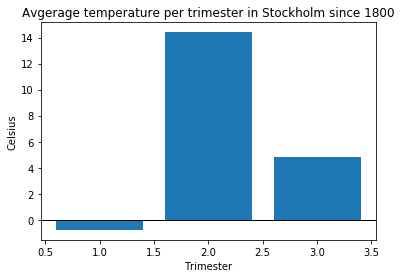

In [169]:
# 2/a
import math

trimesters = np.arange(1,4) # or np.unique(data[:,1])
trimester_mean = [np.mean(stockholm_data[np.logical_and(stockholm_data[:,1] <= 4*i, stockholm_data[:,1] >= 4*i-3), 3]) for i in trimesters]

fig, ax = plt.subplots()
ax.bar(trimesters, trimester_mean)
plt.axhline(0, linewidth=1, color='k')
ax.set_xlabel("Trimester")
ax.set_ylabel("Celsius");
ax.set_title("Avgerage temperature per trimester in Stockholm since 1800")
show()


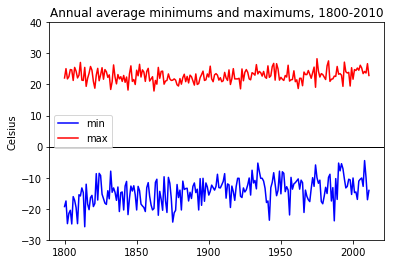

In [168]:
# 2/b: annual minimums and maximums
years = np.arange(1800, 2012)
mins = [np.min(stockholm_data[stockholm_data[:,0] == year, 3]) for year in years]
maxs = [np.max(stockholm_data[stockholm_data[:,0] == year, 3]) for year in years]

fig, ax1 = plt.subplots()

plt.plot(years, mins, 'b-', years, maxs, 'r-')
plt.axhline(0, linewidth=1, color='k')
ax1.legend(["min", "max"], loc = 6)
ax1.set_ylim(-30, 40)
ax1.set_ylabel("Celsius")
ax1.set_title("Annual average minimums and maximums, 1800-2010")
show()

In [171]:
# 3

### Assignment 3, Class7
Altogether I haven't been able to find the way of writing the data into a csv file. The moving average and its plot works though. 

In [6]:
import urllib.request
import json
import datetime
time2data = {}
base_url = "http://openexchangerates.org/api"
id_str   = "app_id=%s" % app_id  

for h in range(1999,2017):
    for i in range(3,13, 3):
        if i < 10:
            datum = "%s/historical/" + str(h) + "-" + str(0) + str(i) + "-15.json?%s"
        else:
            datum = "%s/historical/" + str(h) + "-" + str(i) + "-15.json?%s"
        URL = datum % (base_url, id_str)
        request = urllib.request.Request(URL)
        result = urllib.request.urlopen(request)
        text = result.read()
        text_to_dic = json.loads(text)
        timestamp = text_to_dic["timestamp"]
        key = (int(datetime.datetime.fromtimestamp(timestamp).strftime("%Y")),int(datetime.datetime.fromtimestamp(timestamp).strftime("%m")))
        time2data[key] = text_to_dic["rates"]

In [64]:
import numpy as np
x = []
y = []
list_ex_EURUSD = []
list_ex_GBPUSD = []
list_ex_USDHUF = []
list_ex_USDJPY = []

for key in time2data:
    x.append(key[0])
    y.append(key[1])
    data = time2data[key]
    
    exch_eur = 1 / data["EUR"]      # EURUSD is quoted as USD per one unit of EUR
    list_ex_EURUSD.append(exch_eur)
    
    exch_gbp = 1 / data["GBP"]
    list_ex_GBPUSD.append(exch_gbp)
    
    exch_huf = data["HUF"]
    list_ex_USDHUF.append(exch_huf)
    
    exch_jpy = data["JPY"]
    list_ex_USDJPY.append(exch_jpy)

np.savetxt("fx.csv", np.stack([x, y, list_ex_EURUSD, list_ex_GBPUSD, list_ex_USDHUF, list_ex_USDHUF]), delimiter=",")
#np.savetxt("EUR.dat", (list_ex_EURUSD, list_ex_GBPUSD), delimiter = ",")

3) By using the API exchange rate, get the rates each 3 months from 1999 to 2016. Create a csv file (you can look up the module csv or just write your own functions) with the rate for the currencies Euro, British Pound Sterling, Hungarian Forint, Japanese Yen, in this time span. Use numpy to load this csv file and:
* plot in the same figure the yearly averages of these currencies over time.
* plot their moving average in a 5 year window.
* plot the maximum in each 2 years window for EUR and HUF.

In [3]:
xydata = np.loadtxt("fx.csv", delimiter=",")
xydata = xydata.T

In [2]:
import numpy as np
import matplotlib.ticker as ticker
import datetime

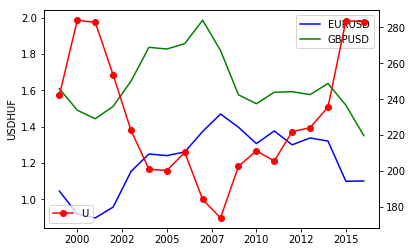

In [23]:

years = np.arange(1999, 2017)
avgEURUSD = [np.mean(xydata[xydata[:,0] == year, 2]) for year in years]
avgGBPUSD = [np.mean(xydata[xydata[:,0] == year, 3]) for year in years]
avgUSDHUF = [np.mean(xydata[xydata[:,0] == year, 4]) for year in years]
avgUSDJPY = [np.mean(xydata[xydata[:,0] == year, 5]) for year in years]

fig, ax1 = plt.subplots()

ax1.plot(years, avgEURUSD, "b-", years, avgGBPUSD, "g-")
ax1.legend(["EURUSD", "GBPUSD"])
ax1.set_ylabel("EURUSD, GBPUSD")
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax2 = ax1.twinx()
ax2.plot(years, avgUSDHUF, "ro-")
ax2.legend("USDHUF")
ax1.set_ylabel("USDHUF")
plt.show()

In [89]:
def movingaverage(inputarray, window_size, column):
    """
    The function calculates moving averages from a 2D array, where the first two columns are year and month.
    Values come from column 2 onwards. 
    Inputs: the inputarray, the length of the ma avg window and the index of the column of the values to calculate the 
    moving average for.
    Output: a dictionary, where keys are (year, month) tuples, and values (rate, moving average) tuples.
    """
    
    shape = inputarray.shape
    numberofperiods = shape[0]
    outputdict = {}
    
    for i in range(0, numberofperiods):
        #key = tuple(inputarray[i,0], inputarray[i,1])
        key = (inputarray[i,0], inputarray[i,1])
        if i < window_size - 1:
            avg = (float("nan"))
        else:
            avg = np.mean(inputarray[i-(window_size -1):i, column])
        outputdict[key] = (inputarray[i,column], avg)
    return outputdict

In [90]:
EURUSDavg = movingaverage(xydata, 20, 3)


In [91]:
?movingaverage

In [77]:
import datetime

dates = [datetime.date(int(key[0]), int(key[1]), 15) for key in EURUSDavg.keys()]
rates = [EURUSDavg[key][0] for key in EURUSDavg.keys()]
averages = [EURUSDavg[key][1] for key in EURUSDavg.keys()]

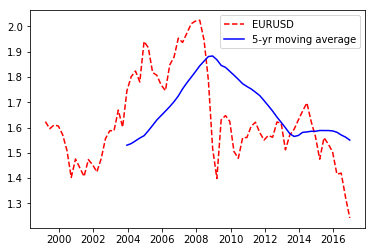

In [79]:
fig, ax1 = plt.subplots()


plt.plot(dates, rates, 'r--', dates, averages, 'b-')
ax1.xaxis_date()
ax1.legend(["EURUSD", "5-yr moving average"])
ax1.legend=(["EURUSD", "5-yr moving averag"])

plt.show()

In [7]:
def maximum(inputarray, window_size, column):
    """
    The function calculates the maximum value of a timeseries from an np.array, where col 0 & 1 are years and months, while
    values come from col 2 onwards. Other inputs are the length of the window and index of the column for the values of which
    the maximum should be calculated. 
    
    The output is a dictionary where keys are (year, month) tuples and values are (original value, maximum value) tuples. 
    """
    
    shape = inputarray.shape
    numberofperiods = shape[0]
    outputdict = {}
    
    for i in range(1, numberofperiods):
        
        key = (inputarray[i,0], inputarray[i,1])
        if i < window_size - 1:
            maximum = np.max(inputarray[0:i, column])
        else:
            maximum = np.max(inputarray[i-(window_size -1):i, column])
        outputdict[key] = (inputarray[i,column], maximum)
    return outputdict

In [8]:
?maximum

In [13]:
EURUSDmax = maximum(xydata, 8, 3)
dates = [datetime.date(int(key[0]), int(key[1]), 15) for key in EURUSDmax.keys()]
rates = [EURUSDmax[key][0] for key in EURUSDmax.keys()]
averages = [EURUSDmax[key][1] for key in EURUSDmax.keys()]

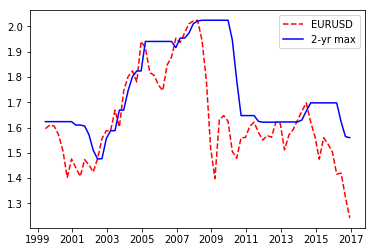

In [14]:
fig, ax1 = plt.subplots()


plt.plot(dates, rates, 'r--', dates, averages, 'b-')
ax1.xaxis_date()
ax1.legend(["EURUSD", "2-yr max"])
ax1.legend=(["EURUSD", "2-yr max"])

plt.show()